In [1]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


Normalizing data set

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
ann = models.Sequential(
    [
     layers.Flatten(input_shape=(32,32,3)),
     layers.Dense(3000,activation='relu'),
     layers.Dense(1000,activation='relu'),
     layers.Dense(10,activation='softmax')
    ]
)

In [ ]:
ann.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 139s 88ms/step - loss: 1.8771 - accuracy: 0.3267
Epoch 2/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.6638 - accuracy: 0.4000
Epoch 3/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.5890 - accuracy: 0.4286
Epoch 4/10
1563/1563 [==============================] - 138s 88ms/step - loss: 1.5381 - accuracy: 0.4487
Epoch 5/10
1563/1563 [==============================] - 135s 87ms/step - loss: 1.5051 - accuracy: 0.4608
Epoch 6/10
1563/1563 [==============================] - 135s 86ms/step - loss: 1.4709 - accuracy: 0.4736
Epoch 7/10
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4461 - accuracy: 0.4819
Epoch 8/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4266 - accuracy: 0.4888
Epoch 9/10
1563/1563 [==============================] - 137s 88ms/step - loss: 1.4037 - accuracy: 0.4951
Epoch 10/10
1563/1563 [==============================] 

In [5]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
                         layers.MaxPool2D((2,2)),
                         layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                         layers.MaxPool2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='softmax')
])

In [6]:
cnn.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4917 - accuracy: 0.4611
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1448 - accuracy: 0.5982
Epoch 3/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.0009 - accuracy: 0.6521
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9187 - accuracy: 0.6821
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8549 - accuracy: 0.7041
Epoch 6/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8026 - accuracy: 0.7213
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7596 - accuracy: 0.7364
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7174 - accuracy: 0.7509
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6844 - accuracy: 0.7625
Epoch 10/10
1563/1563 [==============================] - 62s 40m

we can clearly see that,ANN provides only 0.50 accuracy whereas cnn gives 0.77 

In [8]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9363 - accuracy: 0.6870


[0.9362587928771973, 0.6869999766349792]

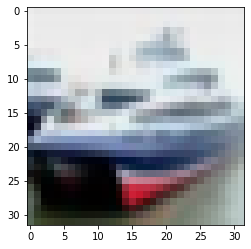

Predicted value: automobile
Actual value: ship


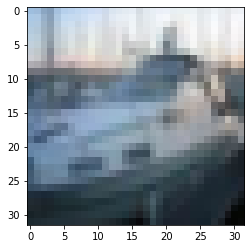

Predicted value: automobile
Actual value: ship


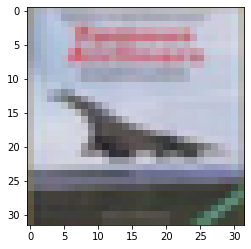

Predicted value: airplane
Actual value: airplane


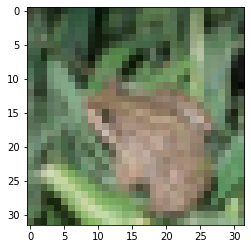

Predicted value: deer
Actual value: frog


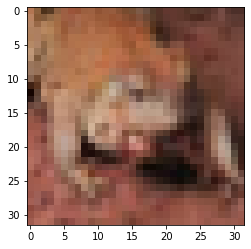

Predicted value: frog
Actual value: frog


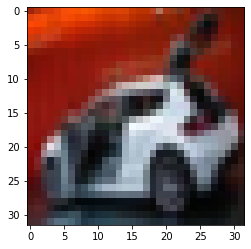

Predicted value: truck
Actual value: automobile


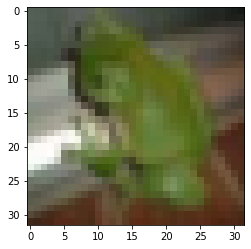

Predicted value: frog
Actual value: frog


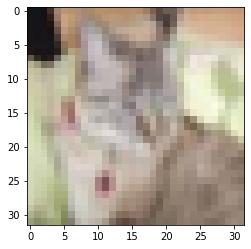

Predicted value: cat
Actual value: cat


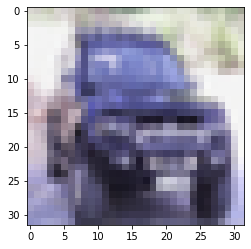

Predicted value: automobile
Actual value: automobile


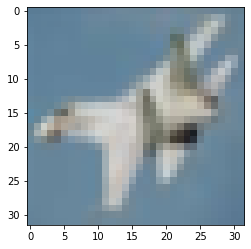

Predicted value: airplane
Actual value: airplane


In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(1,11):
  plt.imshow(x_test[i])
  plt.show()
  print("Predicted value:",classes[np.argmax(cnn.predict(x_test[i:i+1]))])
  print("Actual value:",classes[y_test[i][0]])

In [20]:
from sklearn.metrics import classification_report
y_pred = cnn.predict(x_test)
y_pred_class = [np.argmax(i) for i in y_pred]
report = classification_report(y_test,y_pred_class)

In [23]:
print("Classification Report \n",report)

Classification Report 
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.84      0.77      0.81      1000
           2       0.78      0.41      0.54      1000
           3       0.52      0.48      0.50      1000
           4       0.53      0.76      0.62      1000
           5       0.63      0.59      0.61      1000
           6       0.80      0.71      0.75      1000
           7       0.77      0.70      0.73      1000
           8       0.75      0.83      0.79      1000
           9       0.65      0.88      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000

